### 1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:
 <b> а) зависимость цены на недвижимость в конкретном регионе от времени:</b> - является временным рядом, так как стоимость одних и тех же объектов фиксируется в разные периоды времени

 <b>б) скорость полета самолета при перелете из аэропорта А в аэропорт В: </b> - можно интерпретировать как временной ряд, если фиксировать текущую скорость в каждый момент времени. В таком случае можно будет явно выделять фазы взлета, посадки и обычного полета.

 <b>в) количество отказов компьютера</b> - не является временным рядом. Чтобы получился временной ряд - нужно фиксировать отказы, например, по дням.

 <b>г) число обращений в поликлинику по району </b> - не является временным рядом.

 <b> д) координаты автобуса при движении по маршруту </b> - подходит под определение временного ряда, каждому моменту движения можно сопоставить свои координаты. 
 
 <b> е) координаты фигуры нарушителя в файле видеофиксации охранной системы. </b> Если предположить, что система видеофиксации состоит из множества камер на разных участках предприятия, то она регистрирует нарушителя множество раз на разных участках - в таком случае мы получим временной ряд, описывающий передвижение нарушителя (похоже на предыдущий пример)
 

### 2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [14]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [26]:
data.head(3)

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


Видим отсутствие пропусков, данные вносяться каждый час.

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
DUQ_MW,119068.0,1658.820296,301.74064,1014.0,1444.0,1630.0,1819.0,3054.0


Text(0, 0.5, 'МВт')

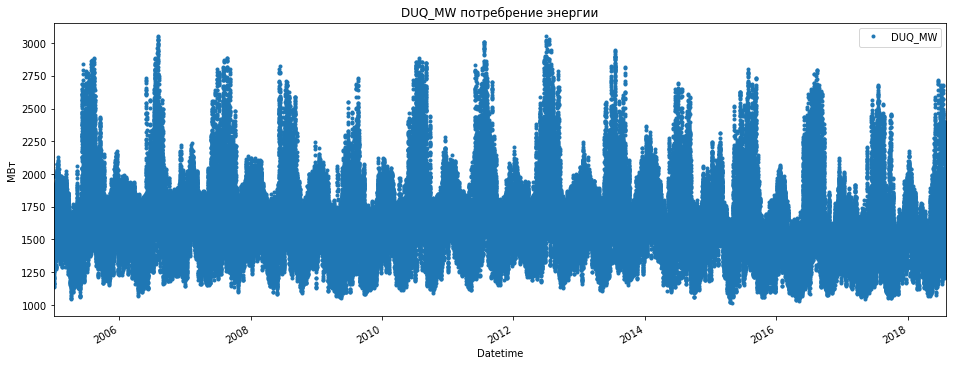

In [39]:
data.plot(figsize=(16, 6), style='.', title='DUQ_MW потребрение энергии')
plt.ylabel('МВт')

Text(0, 0.5, 'МВт')

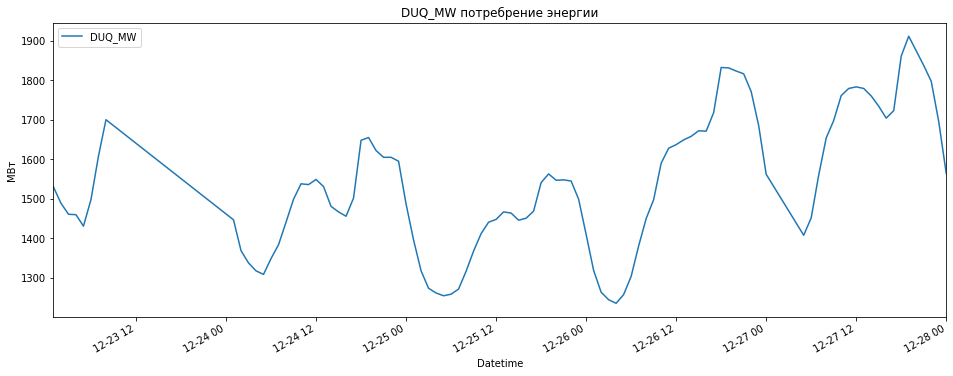

In [54]:
data.iloc[100:200].plot(figsize=(16, 6), title='DUQ_MW потребрение энергии')
plt.ylabel('МВт')

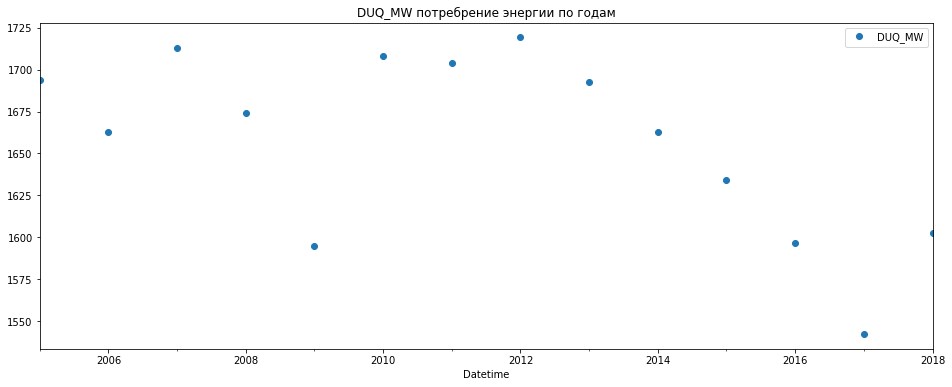

In [116]:
data.resample('Y').mean().plot(figsize=(16, 6), title='DUQ_MW потребрение энергии по годам', style='o')

Выводы: <br>
1) Данные цикличны как в рамках года. Мы выдим значительный рост потребления энергии в третьем квартале, и небольшой новогодний(рождетсвенский пик). Возможно, летом все дома и офисы включают кондиционеры. <br>
2) Данные имеют суточный цикл. Явное снижение потребления энергии в ночной период. <br>
3) С 2012 года среднее потребление энергии за год снижалось, вплоть до 2017.

### 3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.


In [72]:
df = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_date=[0])

In [74]:
df.head(3)

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37


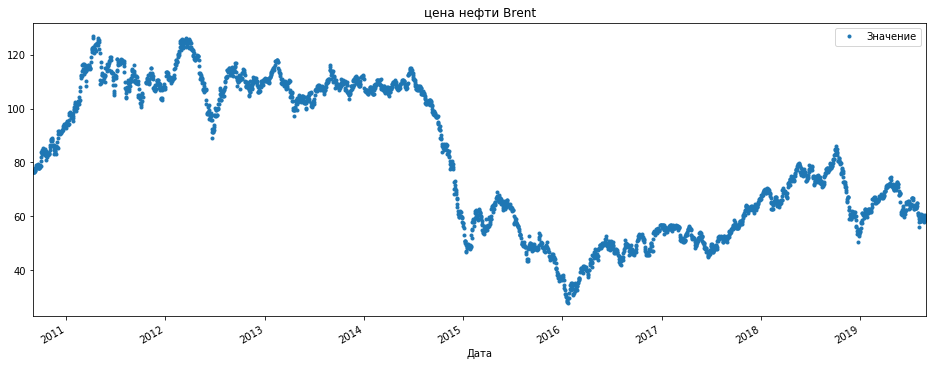

In [78]:
df.plot(figsize=(16, 6), style='.', title='цена нефти Brent')

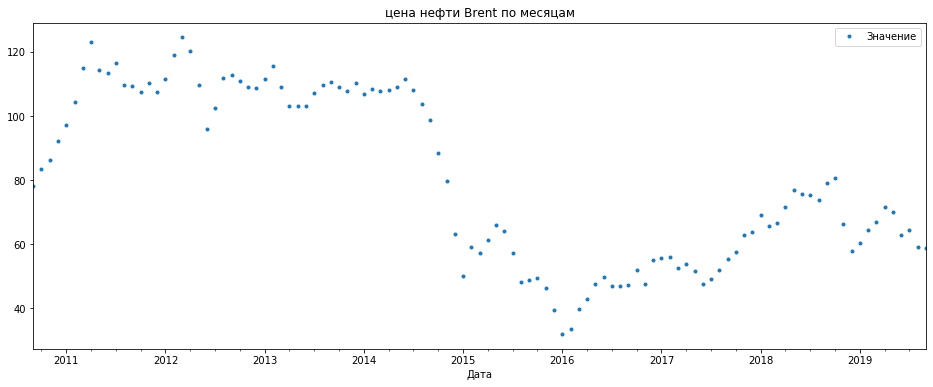

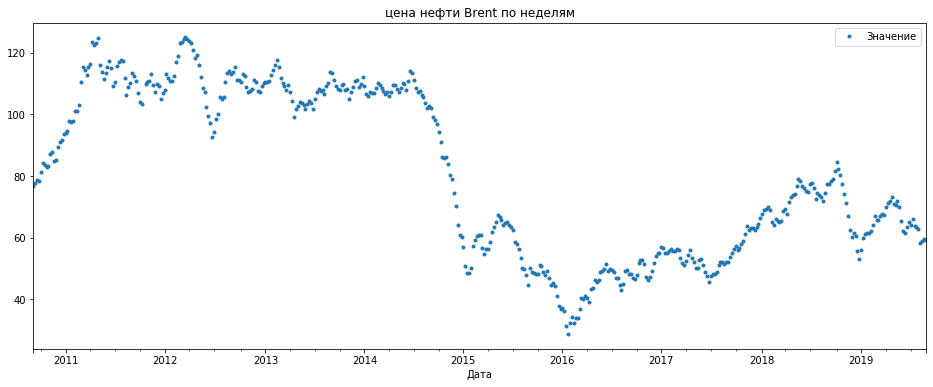

In [80]:
df.resample('M').mean().plot(figsize=(16, 6), style='.', title='цена нефти Brent по месяцам')
df.resample('W').mean().plot(figsize=(16, 6), style='.', title='цена нефти Brent по неделям')

### 4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

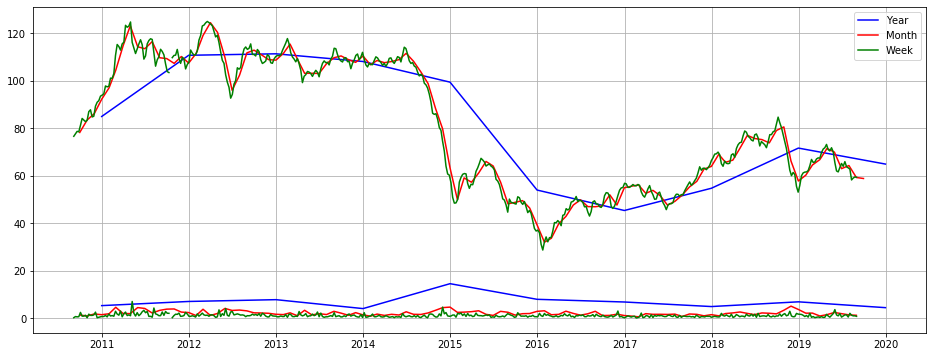

In [114]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(16, 6)
ax.grid()
ax.plot(df['Значение'].resample('Y').mean(), label='Year', color='b')
ax.plot(df['Значение'].resample('Y').std(), color='b')

ax.plot(df['Значение'].resample('M').mean(), label='Month', color='r')
ax.plot(df['Значение'].resample('M').std(), color='r')

ax.plot(df['Значение'].resample('W').mean(), label='Week', color='g')
ax.plot(df['Значение'].resample('W').std(), color='g')
ax.legend()

### 5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым

Недельный и месячные графики более подробно показывают нам изменения. Например, если взять отрезок с 2012 по 2013 год - годовой график практически не показывает изменений, в то время как недельный и месячный показывают нам взлеты и падения цены. <br>
Однако, если мы посмотрим на годовой график среднего отклонения - это значение достаточно высокое. Оно показывает нам, что за данный период цены значительно менялись.